In [27]:
import numpy as np
from scipy import stats
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso

from scipy.stats import pearsonr, spearmanr

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [28]:
df = pd.read_csv(r'AirQualityUCI.csv', sep=';')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
warnings.simplefilter('ignore') #Скрыть все предупреждения от пользователей по умолчанию

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [31]:
tabledata = [["Date ", "Дата", "объектный"], #создание новой таблицы
             ["Time", "Время","объектный"],
             ["CO(GT)", "Истинная усредненная за час концентрация CO в мг / м ^ 3 (эталонный анализатор)","объектный"],
             ["PT08.S1(CO)", "PT08.S1 (оксид олова) усредненный за час отклик датчика (номинальный целевой уровень CO)","вещественный"],
             ["NMHC(GT)", "Истинное часовое усреднение общей концентрации неметанических углеводородов в мкг / м ^ 3 (эталонный анализатор)","вещественный"],
             ["C6H6(GT)", "Истинная усредненная почасовая концентрация бензола в мкг / м ^ 3 (эталонный анализатор)","объектный"],
             ["PT08.S2(NMHC) ", " PT08.S2 (диоксид титана), усредненный за час отклик сенсора (номинально нацеленный на NMHC)", "вещественный"],
             ["NOx(GT) ", "Истинная усредненная за час концентрация NOx в частях на миллиард (эталонный анализатор)", "вещественный"],
             ["PT08.S3(NOx) ", "PT08.S3 (оксид вольфрама), усредненный за час отклик датчика (номинальное значение NOx)", "вещественный"],
             ["NO2(GT) ", "Истинная усредненная за час концентрация NO2 в мкг / м ^ 3 (эталонный анализатор)", "вещественный"],
             ["PT08.S4(NO2)", "PT08.S4 (оксид вольфрама), усредненный за час отклик датчика (номинальное значение NO2)", "вещественный"],
             ["PT08.S5(O3)", "PT08.S5 (оксид индия) усредненный за час отклик датчика (номинально заданный O3)", "вещественный"],
             ["T", "Температура в ° C", "объектный"],
             ["RH ", "Относительная влажность (%)", "объектный"],
             ["AH ", "Абсолютная влажность", "объектный"],] 
tabledata
pd.DataFrame(tabledata, columns=[" Признак","Описание", "Тип"]) #название колонок

,Признак,Описание,Тип
0,Date,Дата,объектный
1,Time,Время,объектный
2,CO(GT),Истинная усредненная за час концентрация CO в ...,объектный
3,PT08.S1(CO),PT08.S1 (оксид олова) усредненный за час откли...,вещественный
4,NMHC(GT),Истинное часовое усреднение общей концентрации...,вещественный
5,C6H6(GT),Истинная усредненная почасовая концентрация бе...,объектный
6,PT08.S2(NMHC),"PT08.S2 (диоксид титана), усредненный за час ...",вещественный
7,NOx(GT),Истинная усредненная за час концентрация NOx в...,вещественный
8,PT08.S3(NOx),"PT08.S3 (оксид вольфрама), усредненный за час ...",вещественный
9,NO2(GT),Истинная усредненная за час концентрация NO2 в...,вещественный


### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [32]:
df.shape #shape - размера, формы и размеров фреймов данных и серий.

(9471, 17)

In [33]:
df.drop_duplicates() #drop_duplicates - помогает удалить дубликаты из фрейма данных.inplace=True - удаляет строки с дубликатами, если True.
df.shape

(9471, 17)

### 3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

#### Разделим признаки на категориальные и количественные

In [34]:
df.nunique() #nunique() используется для подсчета уникальных значений.

Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [35]:
numerical = [i for i in df.columns if df[i].dtype.name != 'object'] # цикл для отбра колонок с количественными признаками
categorial = [i for i in df.columns if df[i].dtype.name == 'object'] # цикл для отбора качественных признаков
print("Numerical",numerical)
print("Categorial",categorial)

Numerical ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Unnamed: 15', 'Unnamed: 16']
Categorial ['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']


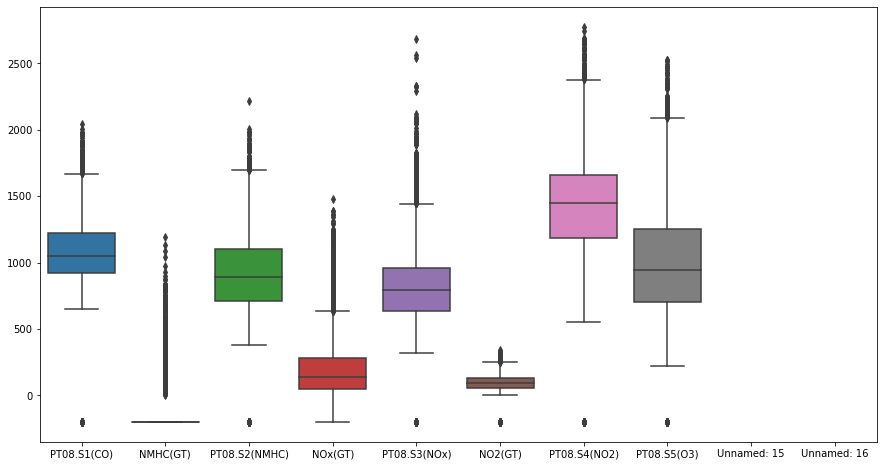

In [36]:
plt.figure(figsize=(15,8)) #создаем фигуру размером 15 на 8
sns.boxplot(data=df[numerical]) #выбираем нужные колонки
plt.show() #вывод боксплота

In [37]:
scaler = MinMaxScaler() #Диапазон по умолчанию для функции, возвращаемой MinMaxScaler, составляет от 0 до 1.
df[numerical] = scaler.fit_transform(df[numerical]) #Применяем функцию к набору данных с помощью функции fit_transform().
df.head() #вывод таблицы

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",0.696429,0.251980,"11,9",0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,0.666071,0.224622,"9,4",0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",0.715179,0.207343,"9,0",0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",0.703571,0.201584,"9,2",0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",0.657143,0.180706,"6,5",0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,"11,2","59,6","0,7888",NaN,NaN


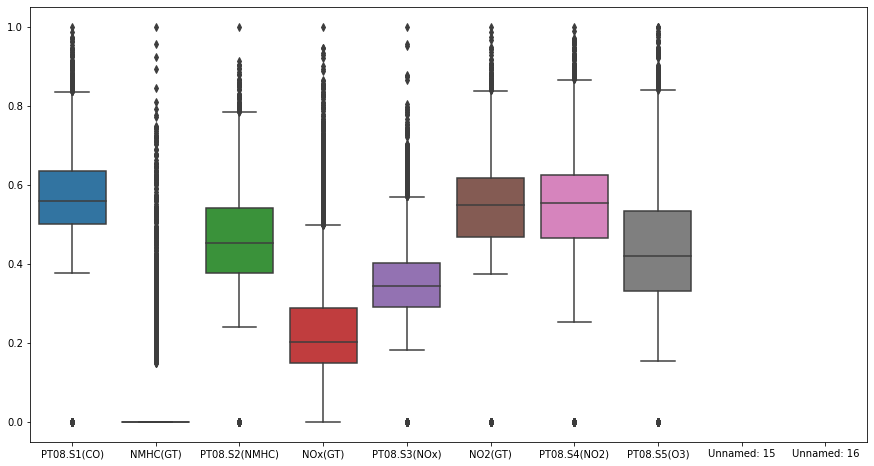

In [38]:
plt.figure(figsize=(15,8)) #вывод таблицы после маштабирования
sns.boxplot(data=df[numerical])
plt.show() 

### 4.Выполните замену категориальных признаков;выберите и обоснуйте способ замены

In [39]:
labelEncoder = LabelEncoder() #Создание экземпляра объекта LabelEncoder
df['Date'] = labelEncoder.fit_transform(df['Date']) 
df['Time'] = labelEncoder.fit_transform(df['Time']) 
df['CO(GT)'] = labelEncoder.fit_transform(df['CO(GT)']) 
df['C6H6(GT)'] = labelEncoder.fit_transform(df['C6H6(GT)']) 
df['T'] = labelEncoder.fit_transform(df['T']) 
df['RH'] = labelEncoder.fit_transform(df['RH']) 
df['AH'] = labelEncoder.fit_transform(df['AH']) 
df #Вывод таблицы

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,114,18,33,0.696429,0.251980,39,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,66,375,1896,NaN,NaN
1,114,19,26,0.666071,0.224622,402,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,63,363,1727,NaN,NaN
2,114,20,29,0.715179,0.207343,398,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,49,426,1853,NaN,NaN
3,114,21,29,0.703571,0.201584,400,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,40,486,2056,NaN,NaN
4,114,22,18,0.657143,0.180706,372,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,42,482,2066,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN
9467,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN
9468,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN
9469,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN


### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

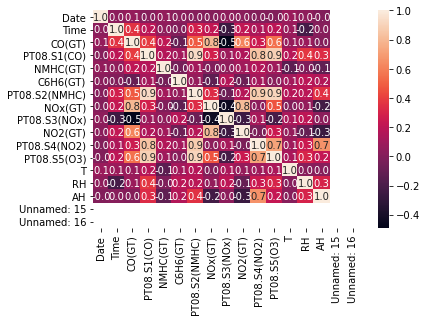

In [40]:
corr_df = df.corr() #создание нового фрейма по корреляции
sns.heatmap(corr_df, annot=True, fmt='.1f')
#Метод .corr() - будет добавлен к данным в качестве первого аргумента
#annot=True, который помогает отобразить коэффициент корреляции.
# fmt = '.1g' - отображение одной цифры, после запятой 

### 6.Заполните пропущенные значения в данных;

In [41]:
df.notnull().count() #вывод ненулевых значений и их подсчет

Date             9471
Time             9471
CO(GT)           9471
PT08.S1(CO)      9471
NMHC(GT)         9471
C6H6(GT)         9471
PT08.S2(NMHC)    9471
NOx(GT)          9471
PT08.S3(NOx)     9471
NO2(GT)          9471
PT08.S4(NO2)     9471
PT08.S5(O3)      9471
T                9471
RH               9471
AH               9471
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

### 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

In [42]:
df.fillna(0, inplace=True)

#### линейная регрессия, LASSO регуляризатор

In [43]:
from  sklearn import linear_model
#разделяем данных на “атрибуты” и “метки”. Атрибуты являются независимыми переменными, а метки-зависимыми переменными, значения которых должны быть предсказаны.
X, y = df.drop(['NMHC(GT)'], axis=1), df['NMHC(GT)']
#разделяем эти данные на обучающие и тестовые наборы. Мы сделаем это с помощью встроенного метода Scikit-Learn train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) #разбивает 70% данных на обучающий набор, а 30% – на тестовый. Переменная test_size – это то место, где мы фактически указываем долю тестового набора.
#обучение алгоритма
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1)

In [44]:
#выводим реальные значения
xt = reg.predict(X_test)
print(xt[:10])

[ 0.04771095  0.07753458  0.00212299  0.05598622  0.04320068  0.01056354
  0.025511   -0.00413781  0.01049732 -0.02184445]


In [45]:
#выводим предсказанные значения
print(y_test[:10])

1102    0.190065
8763    0.000000
2091    0.000000
439     0.163427
8734    0.000000
2652    0.000000
8466    0.000000
3855    0.000000
5071    0.000000
3548    0.000000
Name: NMHC(GT), dtype: float64


In [46]:
#Вычислияем точность решения задачи, вычислив разницу между реальным значением и предсказанным.
print(xt[:10]-y_test[:10])

1102   -0.142354
8763    0.077535
2091    0.002123
439    -0.107441
8734    0.043201
2652    0.010564
8466    0.025511
3855   -0.004138
5071    0.010497
3548   -0.021844
Name: NMHC(GT), dtype: float64


In [47]:
#выводим значение для перехвата,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.coef_

array([ 4.12932911e-05,  0.00000000e+00,  6.90714262e-04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.17650067e-04,
       -0.00000000e+00, -6.25703649e-06,  0.00000000e+00,  0.00000000e+00])

In [48]:
#выводи значения для наклона,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.intercept_

0.047828023153999005

#### линейная регрессия без использования регуляризаторов

In [49]:
#разделяем данных на “атрибуты” и “метки”. Атрибуты являются независимыми переменными, а метки-зависимыми переменными, значения которых должны быть предсказаны.
X, y = df.drop(['NMHC(GT)'], axis=1), df['NMHC(GT)']
#разделяем эти данные на обучающие и тестовые наборы. Мы сделаем это с помощью встроенного метода Scikit-Learn train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) ##разбивает 70% данных на обучающий набор, а 30% – на тестовый. Переменная test_size – это то место, где мы фактически указываем долю тестового набора.
#обучение алгоритма
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
##выводим значение для перехвата,вычисленное алгоритмом линейной регрессии для нашего набора данны
reg.coef_

array([ 4.56923153e-05,  1.52240215e-04,  2.81531508e-03,  4.32300419e-01,
        9.84273154e-07, -1.03499278e+00, -3.62236815e-01, -1.59441433e-01,
        8.68393565e-02,  8.44134600e-01, -1.82966816e-02, -1.01718428e-04,
       -2.62805622e-06, -3.67194382e-05,  0.00000000e+00,  0.00000000e+00])

In [51]:
#выводи значения для наклона,вычисленное алгоритмом линейной регрессии для нашего набора данных
reg.intercept_

-0.027625797309421104

In [52]:
r, p = stats.pearsonr(xt[:10], y_test[:10])
k, l = stats.spearmanr(xt[:10], y_test[:10])
print('Pearson’s correlation coefficient: ', r)
print('p-value: ', p)
print('Spearman’s correlation coefficient: ', k)
print('p-value: ', l)

Pearson’s correlation coefficient:  0.4569777876403772
p-value:  0.18425869092838315
Spearman’s correlation coefficient:  0.5103493078392206
p-value:  0.1317596196544768
